In [2]:
!pip install --upgrade pip
!pip3 install pandas
!pip3 install networkx

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip3 install sklearn
!pip3 install scipy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [16]:
!pip3 install matplotlib

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 10.3 MB 1.8 MB/s            
     |████████████████████████████████| 1.2 MB 2.7 MB/s            


In [1]:
import warnings
!pip install pandas
import pandas as pd
from IPython.display import display
import networkx as nx
import matplotlib.pyplot as plt
# pd.options.display.max_columns = 20
warnings.filterwarnings("ignore")
import glob
from sklearn import preprocessing
import networkx as nx
import numpy as np

global label
import argparse
import os.path
from os import path
from itertools import combinations
from scipy.spatial.distance import pdist, squareform, cdist
from scipy.spatial import distance
import scipy
import itertools

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
def read_label(dataset):
    if dataset == 'low_freq':
        houses = 7
    elif dataset == 'UK-DALE':
        houses = 6
    else:
        houses = 21

    label = {}
    for i in range(1, houses):
        hi = dataset + '/house_{}/labels.dat'.format(i)
        label[i] = {}
        with open(hi) as f:
            for line in f:
                splitted_line = line.split(' ')
                label[i][int(splitted_line[0])] = splitted_line[1].strip() + '_' + splitted_line[0]
    return label

In [3]:
def read_merge_data(house, labels, dataset):
    num_apps = 0
    if dataset == 'low_freq':
        houses = 7
    elif dataset == 'UK-DALE':
        houses = 6
        num_apps = -1
    else:
        houses = 21
    path = dataset + '/house_{}/'.format(house)
    file = path + 'channel_1.dat'
    df = pd.read_table(file, sep=' ', names=['unix_time', labels[house][1]],
                       dtype={'unix_time': 'int64', labels[house][1]: 'float64'})

    num_apps = len(glob.glob(path + 'channel*')) + num_apps
    for i in range(2, num_apps + 1):
        file = path + 'channel_{}.dat'.format(i)
        data = pd.read_table(file, sep=' ', names=['unix_time', labels[house][i]],
                             dtype={'unix_time': 'int64', labels[house][i]: 'float64'})
        df = pd.merge(df, data, how='inner', on='unix_time')
    df['timestamp'] = df['unix_time'].astype("datetime64[s]")
    df = df.set_index(df['timestamp'].values)
    df.drop(['unix_time', 'timestamp'], axis=1, inplace=True)
    return df

In [ ]:
dataset = 'low_freq'  # args.dataset
house = 'house_1'
appliance = 'mains_1'
df = {}
# if dataset != ' UK-REFIT':
labels = read_label(dataset)
for i in range(1, 7):
    df[i] = read_merge_data(i, labels, dataset)
    # alt_df = df[1]['mains_1'].diff()

In [ ]:
# df[1].pd.DataFrame(
#         [(x[0], x[1], np.exp(
#             -(4 * np.log(2) * (np.linalg.norm(x[0] - x[1]))) ** 10) / 2 ** 2) for x in
#          itertools.combinations(nodes['drift'], 2)],
#         columns=['source', 'destination', 'gaussian_kernel'])

AttributeError: 'DataFrame' object has no attribute 'pd'

<AxesSubplot:>

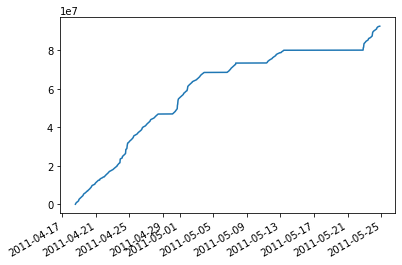

In [20]:
ts = df[1]['mains_1'].cumsum()
ts.plot()

<Figure size 2304x1008 with 0 Axes>

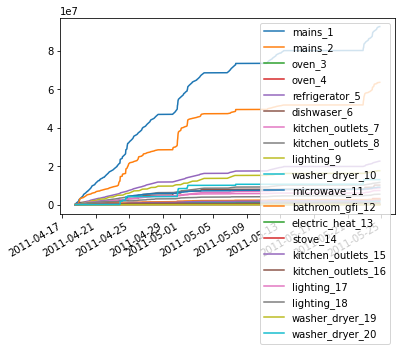

In [24]:
df1 = df[1].cumsum()

plt.figure(figsize=(32,14)); df1.plot(); plt.legend(loc='best')

In [ ]:
# df[1].plot(subplots=True, figsize=(12, 6)); plt.legend(loc='best')

In [9]:
df

{1:                      mains_1  mains_2  oven_3  oven_4  refrigerator_5  \
 2011-04-18 13:22:13   222.20   118.83     0.0     0.0             6.0   
 2011-04-18 13:22:16   223.17   119.19     0.0     0.0             6.0   
 2011-04-18 13:22:20   223.60   118.92     0.0     0.0             6.0   
 2011-04-18 13:22:23   222.91   119.16     0.0     0.0             6.0   
 2011-04-18 13:22:26   222.94   118.83     0.0     0.0             6.0   
 ...                      ...      ...     ...     ...             ...   
 2011-05-24 19:56:20   235.73    38.65     0.0     0.0           186.0   
 2011-05-24 19:56:23   235.03    38.66     0.0     0.0           187.0   
 2011-05-24 19:56:27   235.46    38.61     0.0     0.0           190.0   
 2011-05-24 19:56:30   235.98    38.77     0.0     0.0           189.0   
 2011-05-24 19:56:34   235.29    38.83     0.0     0.0           186.0   
 
                      dishwaser_6  kitchen_outlets_7  kitchen_outlets_8  \
 2011-04-18 13:22:13          0.

In [10]:
df[1].values

array([[222.2 , 118.83,   0.  , ...,  46.  ,   0.  ,   0.  ],
       [223.17, 119.19,   0.  , ...,  46.  ,   0.  ,   0.  ],
       [223.6 , 118.92,   0.  , ...,  46.  ,   0.  ,   0.  ],
       ...,
       [235.46,  38.61,   0.  , ...,   1.  ,   0.  ,   0.  ],
       [235.98,  38.77,   0.  , ...,   1.  ,   0.  ,   0.  ],
       [235.29,  38.83,   0.  , ...,   1.  ,   0.  ,   0.  ]])

In [11]:
df[1]

,mains_1,mains_2,oven_3,oven_4,refrigerator_5,dishwaser_6,kitchen_outlets_7,kitchen_outlets_8,lighting_9,washer_dryer_10,microwave_11,bathroom_gfi_12,electric_heat_13,stove_14,kitchen_outlets_15,kitchen_outlets_16,lighting_17,lighting_18,washer_dryer_19,washer_dryer_20
2011-04-18 13:22:13,222.20,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:16,223.17,119.19,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:20,223.60,118.92,0.0,0.0,6.0,0.0,34.0,22.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:23,222.91,119.16,0.0,0.0,6.0,1.0,35.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:26,222.94,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-24 19:56:20,235.73,38.65,0.0,0.0,186.0,1.0,26.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2011-05-24 19:56:23,235.03,38.66,0.0,0.0,187.0,0.0,24.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2011-05-24 19:56:27,235.46,38.61,0.0,0.0,190.0,0.0,24.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2011-05-24 19:56:30,235.98,38.77,0.0,0.0,189.0,0.0,24.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [19]:
df[1].replace(0,np.nan).dropna(axis=1,how="all")

,mains_1,mains_2,oven_3,oven_4,refrigerator_5,dishwaser_6,kitchen_outlets_7,kitchen_outlets_8,lighting_9,washer_dryer_10,microwave_11,bathroom_gfi_12,electric_heat_13,stove_14,kitchen_outlets_15,kitchen_outlets_16,lighting_17,lighting_18,washer_dryer_19,washer_dryer_20
2011-04-18 13:22:13,222.20,118.83,NaN,NaN,6.0,NaN,34.0,21.0,81.0,NaN,5.0,1.0,NaN,NaN,2.0,NaN,65.0,46.0,NaN,NaN
2011-04-18 13:22:16,223.17,119.19,NaN,NaN,6.0,NaN,34.0,21.0,81.0,NaN,5.0,1.0,NaN,NaN,2.0,NaN,65.0,46.0,NaN,NaN
2011-04-18 13:22:20,223.60,118.92,NaN,NaN,6.0,NaN,34.0,22.0,81.0,NaN,5.0,1.0,NaN,NaN,2.0,NaN,65.0,46.0,NaN,NaN
2011-04-18 13:22:23,222.91,119.16,NaN,NaN,6.0,1.0,35.0,21.0,81.0,NaN,5.0,1.0,NaN,NaN,1.0,NaN,65.0,46.0,NaN,NaN
2011-04-18 13:22:26,222.94,118.83,NaN,NaN,6.0,NaN,34.0,21.0,81.0,NaN,5.0,1.0,NaN,NaN,2.0,NaN,65.0,46.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-24 19:56:20,235.73,38.65,NaN,NaN,186.0,1.0,26.0,20.0,2.0,NaN,4.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
2011-05-24 19:56:23,235.03,38.66,NaN,NaN,187.0,NaN,24.0,20.0,2.0,NaN,4.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
2011-05-24 19:56:27,235.46,38.61,NaN,NaN,190.0,NaN,24.0,20.0,2.0,NaN,4.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
2011-05-24 19:56:30,235.98,38.77,NaN,NaN,189.0,NaN,24.0,20.0,2.0,NaN,4.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN


In [21]:
df[1]

,mains_1,mains_2,oven_3,oven_4,refrigerator_5,dishwaser_6,kitchen_outlets_7,kitchen_outlets_8,lighting_9,washer_dryer_10,microwave_11,bathroom_gfi_12,electric_heat_13,stove_14,kitchen_outlets_15,kitchen_outlets_16,lighting_17,lighting_18,washer_dryer_19,washer_dryer_20
2011-04-18 13:22:13,222.20,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:16,223.17,119.19,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:20,223.60,118.92,0.0,0.0,6.0,0.0,34.0,22.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:23,222.91,119.16,0.0,0.0,6.0,1.0,35.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:26,222.94,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-24 19:56:20,235.73,38.65,0.0,0.0,186.0,1.0,26.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2011-05-24 19:56:23,235.03,38.66,0.0,0.0,187.0,0.0,24.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2011-05-24 19:56:27,235.46,38.61,0.0,0.0,190.0,0.0,24.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2011-05-24 19:56:30,235.98,38.77,0.0,0.0,189.0,0.0,24.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [22]:
(df[1] != 0).any(axis=0)

mains_1               True
mains_2               True
oven_3                True
oven_4                True
refrigerator_5        True
dishwaser_6           True
kitchen_outlets_7     True
kitchen_outlets_8     True
lighting_9            True
washer_dryer_10       True
microwave_11          True
bathroom_gfi_12       True
electric_heat_13      True
stove_14              True
kitchen_outlets_15    True
kitchen_outlets_16    True
lighting_17           True
lighting_18           True
washer_dryer_19       True
washer_dryer_20       True
dtype: bool

In [23]:
df[1].loc[:, (df[1] != 0).any(axis=0)]

,mains_1,mains_2,oven_3,oven_4,refrigerator_5,dishwaser_6,kitchen_outlets_7,kitchen_outlets_8,lighting_9,washer_dryer_10,microwave_11,bathroom_gfi_12,electric_heat_13,stove_14,kitchen_outlets_15,kitchen_outlets_16,lighting_17,lighting_18,washer_dryer_19,washer_dryer_20
2011-04-18 13:22:13,222.20,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:16,223.17,119.19,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:20,223.60,118.92,0.0,0.0,6.0,0.0,34.0,22.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:23,222.91,119.16,0.0,0.0,6.0,1.0,35.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,1.0,0.0,65.0,46.0,0.0,0.0
2011-04-18 13:22:26,222.94,118.83,0.0,0.0,6.0,0.0,34.0,21.0,81.0,0.0,5.0,1.0,0.0,0.0,2.0,0.0,65.0,46.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-05-24 19:56:20,235.73,38.65,0.0,0.0,186.0,1.0,26.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2011-05-24 19:56:23,235.03,38.66,0.0,0.0,187.0,0.0,24.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2011-05-24 19:56:27,235.46,38.61,0.0,0.0,190.0,0.0,24.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2011-05-24 19:56:30,235.98,38.77,0.0,0.0,189.0,0.0,24.0,20.0,2.0,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [8]:
dataset = 'low_freq'  # args.dataset
house = 'house_1'
appliance = 'mains_1'
if dataset != ' UK-REFIT':
    labels = read_label(dataset)
for i in range(1, 3):
    print('House {}: '.format(i), labels[i], '\n')

    # data = pd.read_csv('UK-REFIT/House_1.csv')
df = {}
for i in range(1, 7):
    df[i] = read_merge_data(i, labels, dataset)
    # alt_df = df[1]['mains_1'].diff()



House 1:  {1: 'mains_1', 2: 'mains_2', 3: 'oven_3', 4: 'oven_4', 5: 'refrigerator_5', 6: 'dishwaser_6', 7: 'kitchen_outlets_7', 8: 'kitchen_outlets_8', 9: 'lighting_9', 10: 'washer_dryer_10', 11: 'microwave_11', 12: 'bathroom_gfi_12', 13: 'electric_heat_13', 14: 'stove_14', 15: 'kitchen_outlets_15', 16: 'kitchen_outlets_16', 17: 'lighting_17', 18: 'lighting_18', 19: 'washer_dryer_19', 20: 'washer_dryer_20'} 

House 2:  {1: 'mains_1', 2: 'mains_2', 3: 'kitchen_outlets_3', 4: 'lighting_4', 5: 'stove_5', 6: 'microwave_6', 7: 'washer_dryer_7', 8: 'kitchen_outlets_8', 9: 'refrigerator_9', 10: 'dishwaser_10', 11: 'disposal_11'} 



In [8]:
df[5]

,mains_1,mains_2,microwave_3,lighting_4,outlets_unknown_5,furance_6,outlets_unknown_7,washer_dryer_8,washer_dryer_9,subpanel_10,...,lighting_17,refrigerator_18,lighting_19,dishwaser_20,disposal_21,electronics_22,lighting_23,kitchen_outlets_24,kitchen_outlets_25,outdoor_outlets_26
2011-04-18 04:24:07,115.74,196.83,4.0,0.0,4.0,6.0,1.0,0.0,0.0,12.5,...,0.0,158.0,1.0,1.0,0.0,7.5,67.5,0.0,0.0,0.0
2011-04-18 04:24:11,115.78,197.87,4.0,0.0,4.0,6.0,1.0,0.0,0.0,12.5,...,0.0,160.0,1.0,1.0,0.0,7.5,67.5,0.0,0.0,0.0
2011-04-18 04:24:14,115.57,197.09,3.0,0.0,4.0,6.0,1.0,0.0,0.0,12.5,...,0.0,161.0,1.0,1.0,0.0,10.0,67.5,0.0,0.0,0.0
2011-04-18 04:24:18,115.37,196.08,4.0,0.0,4.0,6.0,0.0,0.0,0.0,12.5,...,0.0,160.0,1.0,2.0,0.0,7.5,67.5,0.0,0.0,0.0
2011-04-18 04:24:21,115.79,196.70,4.0,0.0,4.0,6.0,0.0,0.0,0.0,12.5,...,0.0,157.0,1.0,1.0,0.0,7.5,67.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-06-01 00:19:59,152.24,37.32,3.0,0.0,3.0,7.0,0.0,0.0,0.0,15.0,...,0.0,0.0,2.0,0.0,0.0,7.5,97.5,0.0,0.0,0.0
2011-06-01 00:20:03,151.72,37.41,3.0,0.0,3.0,7.0,0.0,0.0,0.0,12.5,...,0.0,0.0,2.0,0.0,0.0,5.0,105.0,0.0,0.0,0.0
2011-06-01 00:20:07,151.68,37.39,3.0,0.0,3.0,7.0,0.0,0.0,0.0,12.5,...,0.0,0.0,2.0,0.0,0.0,5.0,115.0,0.0,0.0,0.0
2011-06-01 00:20:10,150.42,37.21,3.0,0.0,3.0,7.0,0.0,0.0,0.0,12.5,...,0.0,1.0,2.0,0.0,0.0,5.0,100.0,0.0,0.0,0.0


In [9]:

nodes = pd.DataFrame(columns=['source', 'Timestamp'])
nodes['drift'] = df[5]['mains_1'].diff().shift(-1).iloc[:-1]
threshold = nodes['drift'].abs().mean()
nodes['Timestamp'] = nodes.index
nodes = nodes[abs(nodes['drift']) > threshold]
    # edgelist.reset_index(inplace=True)
edgelist = pd.DataFrame(
        [(x[0], x[1], np.exp(
            -(4 * np.log(2) * (np.linalg.norm(x[0] - x[1]))) ** 10) / 2 ** 2) for x in
         itertools.combinations(nodes['drift'], 2)],
        columns=['source', 'destination', 'gaussian_kernel'])

nodes.shape


In [23]:
nodes.shape

(4126, 7)

In [10]:
edgelist

,source,destination,gaussian_kernel
0,295.79,-3.64,0.000000e+00
1,295.79,166.72,0.000000e+00
2,295.79,467.93,0.000000e+00
3,295.79,-5.90,0.000000e+00
4,295.79,-4.44,0.000000e+00
...,...,...,...
8509870,-4.11,-3.48,3.722698e-116
8509871,-4.11,3.75,0.000000e+00
8509872,3.69,-3.48,0.000000e+00
8509873,3.69,3.75,2.500000e-01


In [11]:
edgelist.drop_duplicates()

,source,destination,gaussian_kernel
0,295.79,-3.64,0.000000e+00
1,295.79,166.72,0.000000e+00
2,295.79,467.93,0.000000e+00
3,295.79,-5.90,0.000000e+00
4,295.79,-4.44,0.000000e+00
...,...,...,...
8509870,-4.11,-3.48,3.722698e-116
8509871,-4.11,3.75,0.000000e+00
8509872,3.69,-3.48,0.000000e+00
8509873,3.69,3.75,2.500000e-01


In [12]:
G = nx.from_pandas_edgelist(df=edgelist, source='source', target='destination', edge_attr=True,
                                create_using=nx.Graph(name='Nilm_Graph'))

In [16]:
for index, row in nodes.iterrows():
        G.nodes[row['drift']]['Timestamp'] = row['Timestamp']

In [14]:
nodes["state"] = np.where(nodes["drift"]>0,1,0)

In [15]:
nodes

,source,Timestamp,drift,state
2011-04-18 10:15:51,NaN,2011-04-18 10:15:51,295.79,1
2011-04-18 10:15:54,NaN,2011-04-18 10:15:54,-3.64,0
2011-04-18 10:17:26,NaN,2011-04-18 10:17:26,166.72,1
2011-04-18 10:17:34,NaN,2011-04-18 10:17:34,467.93,1
2011-04-18 10:17:41,NaN,2011-04-18 10:17:41,-5.90,0
...,...,...,...,...
2011-06-01 00:18:30,NaN,2011-06-01 00:18:30,5.37,1
2011-06-01 00:18:46,NaN,2011-06-01 00:18:46,-4.11,0
2011-06-01 00:18:53,NaN,2011-06-01 00:18:53,3.69,1
2011-06-01 00:19:29,NaN,2011-06-01 00:19:29,-3.48,0


In [16]:
nodes['previous'] = nodes.state.shift(1)

In [17]:
for index, row in nodes.iterrows():
        G.nodes[row['drift']]['state'] = row['state']

In [28]:
G.nodes(data=True)

NodeDataView({295.78999999999996: {'Timestamp': Timestamp('2011-04-18 10:15:51'), 'state': 1}, -3.6399999999999864: {'Timestamp': Timestamp('2011-05-31 18:12:31'), 'state': 0}, 166.72000000000003: {'Timestamp': Timestamp('2011-04-18 10:17:26'), 'state': 1}, 467.93000000000006: {'Timestamp': Timestamp('2011-04-18 10:17:34'), 'state': 1}, -5.899999999999864: {'Timestamp': Timestamp('2011-04-18 10:17:41'), 'state': 0}, -4.440000000000055: {'Timestamp': Timestamp('2011-05-31 19:13:54'), 'state': 0}, -3.42999999999995: {'Timestamp': Timestamp('2011-04-19 10:52:59'), 'state': 0}, -3.159999999999968: {'Timestamp': Timestamp('2011-05-23 01:12:01'), 'state': 0}, -7.220000000000027: {'Timestamp': Timestamp('2011-04-18 10:20:17'), 'state': 0}, 3.4200000000000728: {'Timestamp': Timestamp('2011-05-31 20:42:47'), 'state': 1}, -3.230000000000018: {'Timestamp': Timestamp('2011-05-31 21:17:10'), 'state': 0}, 3.480000000000018: {'Timestamp': Timestamp('2011-05-31 20:32:22'), 'state': 1}, -3.379999999999

In [34]:
nodes

,source,Timestamp,drift,state,previous
2011-04-18 10:15:51,NaN,2011-04-18 10:15:51,295.79,1,NaN
2011-04-18 10:15:54,NaN,2011-04-18 10:15:54,-3.64,0,1.0
2011-04-18 10:17:26,NaN,2011-04-18 10:17:26,166.72,1,0.0
2011-04-18 10:17:34,NaN,2011-04-18 10:17:34,467.93,1,1.0
2011-04-18 10:17:41,NaN,2011-04-18 10:17:41,-5.90,0,1.0
...,...,...,...,...,...
2011-06-01 00:18:30,NaN,2011-06-01 00:18:30,5.37,1,0.0
2011-06-01 00:18:46,NaN,2011-06-01 00:18:46,-4.11,0,1.0
2011-06-01 00:18:53,NaN,2011-06-01 00:18:53,3.69,1,0.0
2011-06-01 00:19:29,NaN,2011-06-01 00:19:29,-3.48,0,1.0


In [18]:
nodes['next2'] = nodes.state.shift(periods=1)

In [19]:
nodes

,source,Timestamp,drift,state,previous,next2
2011-04-18 10:15:51,NaN,2011-04-18 10:15:51,295.79,1,NaN,NaN
2011-04-18 10:15:54,NaN,2011-04-18 10:15:54,-3.64,0,1.0,1.0
2011-04-18 10:17:26,NaN,2011-04-18 10:17:26,166.72,1,0.0,0.0
2011-04-18 10:17:34,NaN,2011-04-18 10:17:34,467.93,1,1.0,1.0
2011-04-18 10:17:41,NaN,2011-04-18 10:17:41,-5.90,0,1.0,1.0
...,...,...,...,...,...,...
2011-06-01 00:18:30,NaN,2011-06-01 00:18:30,5.37,1,0.0,0.0
2011-06-01 00:18:46,NaN,2011-06-01 00:18:46,-4.11,0,1.0,1.0
2011-06-01 00:18:53,NaN,2011-06-01 00:18:53,3.69,1,0.0,0.0
2011-06-01 00:19:29,NaN,2011-06-01 00:19:29,-3.48,0,1.0,1.0


In [21]:
nodes['next'] = nodes['state'].shift(1)

In [22]:
nodes

,source,Timestamp,drift,state,previous,next2,next
2011-04-18 10:15:51,NaN,2011-04-18 10:15:51,295.79,1,NaN,NaN,NaN
2011-04-18 10:15:54,NaN,2011-04-18 10:15:54,-3.64,0,1.0,1.0,1.0
2011-04-18 10:17:26,NaN,2011-04-18 10:17:26,166.72,1,0.0,0.0,0.0
2011-04-18 10:17:34,NaN,2011-04-18 10:17:34,467.93,1,1.0,1.0,1.0
2011-04-18 10:17:41,NaN,2011-04-18 10:17:41,-5.90,0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
2011-06-01 00:18:30,NaN,2011-06-01 00:18:30,5.37,1,0.0,0.0,0.0
2011-06-01 00:18:46,NaN,2011-06-01 00:18:46,-4.11,0,1.0,1.0,1.0
2011-06-01 00:18:53,NaN,2011-06-01 00:18:53,3.69,1,0.0,0.0,0.0
2011-06-01 00:19:29,NaN,2011-06-01 00:19:29,-3.48,0,1.0,1.0,1.0


In [26]:
!pip3 install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 1.0 MB/s            


In [28]:
import seaborn as sns

In [30]:
operator_counts = df[5].mains_1.value_counts()
operators = operator_counts.index
counts = operator_counts.values

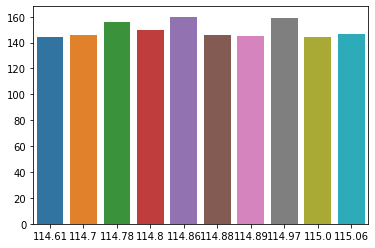

In [31]:
barplot = sns.barplot(x=operators[:10], y=counts[:10])

In [ ]:
barplot = sns.barplot(x=operators, y=counts)

In [ ]:
sns.lineplot(x=df[5].index, y='mains',
             hue="region", style="event",
             data=df[5])